### Exploratory Data Analysis Notebook


#### 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load the dataset

In [16]:
# Load the dataset
df = pd.read_csv('../data/default_of_credit_card_clients.csv', header=1)

# Rename target column to 'default' for clarity
df.rename(columns={'default payment next month': 'default'}, inplace=True)

# Check for nulls and get basic info of the dataset
print(df.isnull().sum())
display(df.describe())

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### 3. View the distribution of default and non-default cases

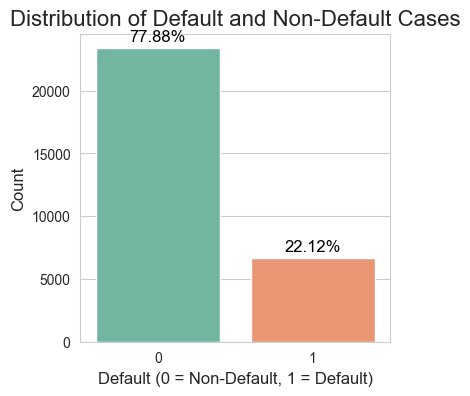

In [17]:
# Distribution of default and non-default cases
plt.figure(figsize=(4, 4))
sns.set_style("whitegrid")
ax = sns.countplot(x='default', data=df, palette='Set2')

# Annotate
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / len(df)
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Add plot specifications
plt.title('Distribution of Default and Non-Default Cases', fontsize=16)
plt.xlabel('Default (0 = Non-Default, 1 = Default)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Observation:
This distribution plot highlights a significant class imbalance in the dataset, where the majority of customers fall into the non-default category (Class 0).

Such imbalance is typical in real-world financial datasets, as most borrowers tend to repay their dues on time. This imbalance must be addressed during modeling, as it can lead to biased models that underperform on the minority class (defaults).

#### 4. Bivariate Analysis 
##### To understand how each individual feature relates to the target variable (default).

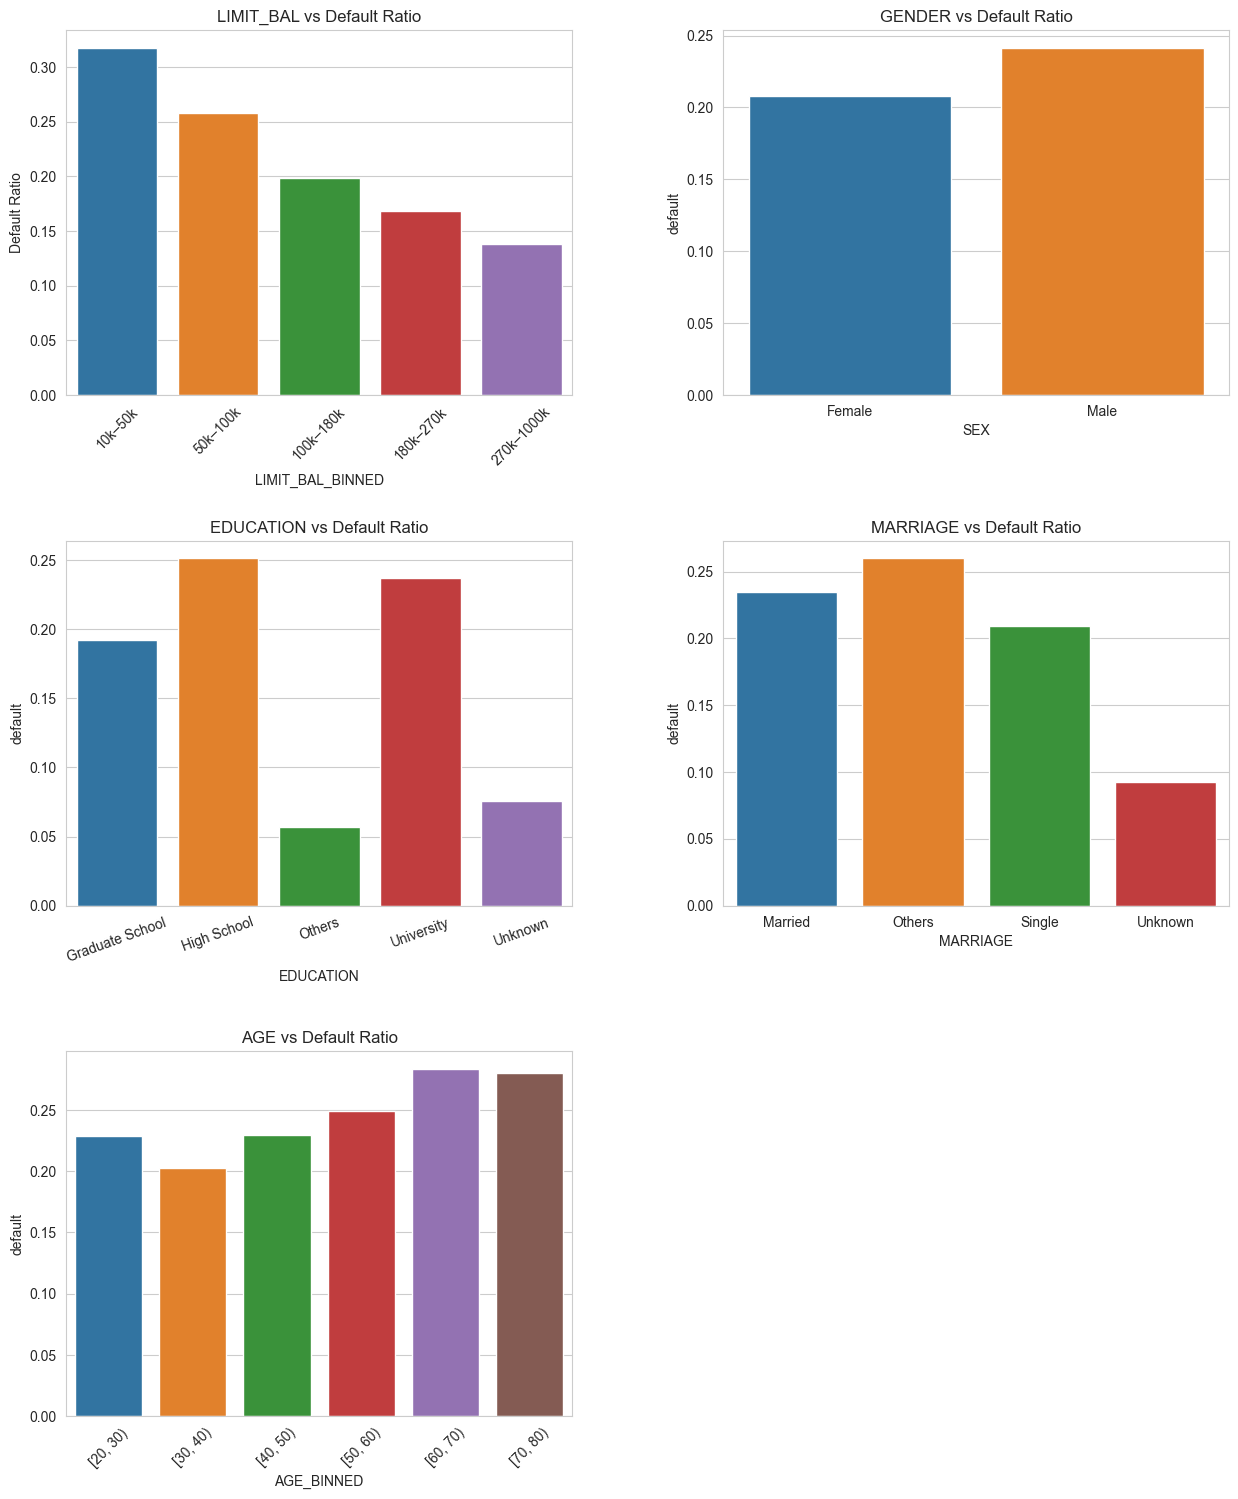

In [27]:
# Ensure 'default' is an integer
df['default'] = df['default'].astype(int)

# Make a copy of the dataframe for binning
df_eda = df.copy()

# Mapping
# GENDER
df_eda['SEX'] = df_eda['SEX'].map({1: 'Male', 2: 'Female'})

# EDUCATION
edu_map = {
    0: 'Unknown',
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown',
    6: 'Unknown'
}
df_eda['EDUCATION'] = df_eda['EDUCATION'].map(edu_map)

# MARRIAGE
df_eda['MARRIAGE'] = df_eda['MARRIAGE'].map({0: 'Unknown', 1: 'Married', 2: 'Single', 3: 'Others'})

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot 1: LIMIT_BAL (binned)
df_eda['LIMIT_BAL_BINNED'] = pd.qcut(df_eda['LIMIT_BAL'], q=5)
limit_bal_ratio = df_eda.groupby('LIMIT_BAL_BINNED')['default'].mean().reset_index()
sns.barplot(x='LIMIT_BAL_BINNED', y='default', data=limit_bal_ratio, ax=axes[0, 0])
# Rotate x-axis labels for readability
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_title('LIMIT_BAL vs Default Ratio')
axes[0, 0].set_ylabel('Default Ratio')
# Format bin labels
axes[0, 0].set_xticklabels([f'{interval.left/1000:.0f}k–{interval.right/1000:.0f}k' 
                            for interval in limit_bal_ratio['LIMIT_BAL_BINNED']])

# Plot 2: GENDER
sex_ratio = df_eda.groupby('SEX')['default'].mean().reset_index()
sns.barplot(x='SEX', y='default', data=sex_ratio, ax=axes[0, 1])
axes[0, 1].set_title('GENDER vs Default Ratio')

# Plot 3: EDUCATION
education_ratio = df_eda.groupby('EDUCATION')['default'].mean().reset_index()
sns.barplot(x='EDUCATION', y='default', data=education_ratio, ax=axes[1, 0])
axes[1, 0].set_title('EDUCATION vs Default Ratio')
axes[1, 0].tick_params(axis='x', rotation=20)

# Plot 4: MARRIAGE
marriage_ratio = df_eda.groupby('MARRIAGE')['default'].mean().reset_index()
sns.barplot(x='MARRIAGE', y='default', data=marriage_ratio, ax=axes[1, 1])
axes[1, 1].set_title('MARRIAGE vs Default Ratio')

# Plot 5: AGE (binned)
df_eda['AGE_BINNED'] = pd.cut(df_eda['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], right=False)
age_ratio = df_eda.groupby('AGE_BINNED')['default'].mean().reset_index()
sns.barplot(x='AGE_BINNED', y='default', data=age_ratio, ax=axes[2, 0])
axes[2, 0].set_title('AGE vs Default Ratio')
axes[2, 0].tick_params(axis='x', rotation=45)

# Turn off empty subplot
axes[2, 1].axis('off')

# Show all the plots
plt.show()

Observations:

1. LIMIT_BAL vs Default Ratio: Customers with lower credit limits tend to have a higher default rate, indicating a possible link between limited credit access and financial stress.

2. GENDER vs Default Ratio: The default rate is slightly higher among males (1) than females (2), though the difference is relatively modest.

3. EDUCATION vs Default Ratio: Individuals with less formal education show a higher default tendency, with the trend generally decreasing as education level increases.

4. MARRIAGE vs Default Ratio: Single individuals (status = 2) seem to default more often compared to married ones, suggesting a potential relationship between marital stability and financial reliability.

5. AGE vs Default Ratio: Younger age groups, especially those under 40, show higher default rates, while older customers tend to default less, possibly due to financial maturity or stability.

#### 5. Correlation Heatmap

To identify multicollinearity, i.e., features that are highly correlated with each other, which can affect model performance. It also helps in spotting which features might be strong predictors of the target variable.

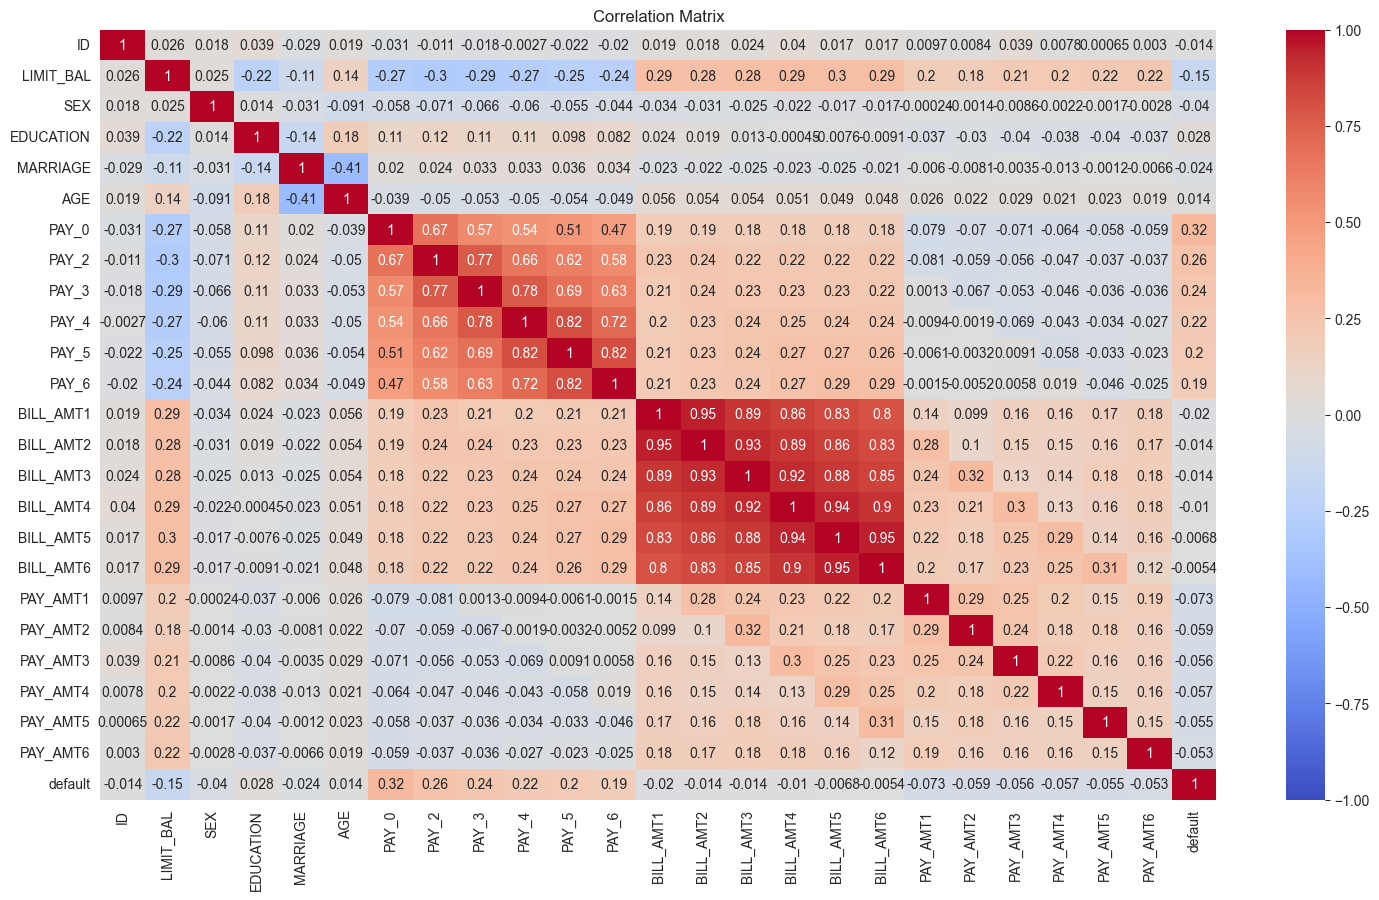

In [ ]:
# Compute the correlation matrix for numerical features
corr_matrix = df.corr()

plt.figure(figsize=(18, 10))
# Create a heatmap with annotations and a diverging color palette
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Observations:

- The `PAY_0` to `PAY_6` features (payment history) show moderate positive correlation with the target variable `default` (around 0.2 to 0.3), suggesting these are important predictors.

- Features like `BILL_AMT1` to `BILL_AMT6` are highly correlated with each other (correlation > 0.8), indicating multicollinearity.

- Most features have weak or no linear correlation with the target, except for the repayment status fields, which appear to be the most informative.
